In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


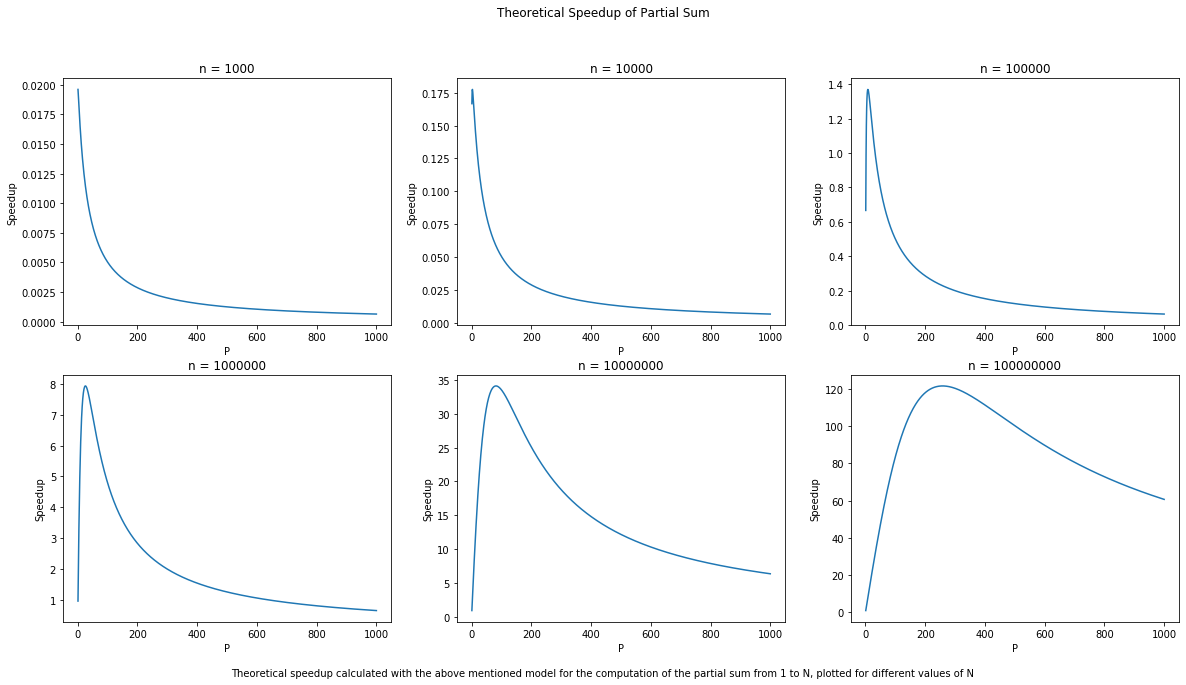

In [88]:
#Plotting theoretical speedup for serial sum parallel algorithm

P = linspace(1,1000,1000)
n = {3,4,5,6,7,8}
T_comp = 2*10e-9
T_read = 10e-4
T_comm = 1.5*10e-6

def Speedup(x,r,T_comp,T_read,T_comm):
    T_P = T_read + T_comm * 2 * (x - 1) + T_comp * (x + r/x)
    T_1 = r * T_comp
    return T_1/T_P

max_val = []
fh = figure(figsize=(20,10))
fh.suptitle("Theoretical Speedup of Partial Sum")
for i in n:
    ax = fh.add_subplot(2,3,i-2)
    ax.set_title("n = " + str(10**i))
    ax.set_xlabel("P")
    ax.set_ylabel("Speedup")
    y = Speedup(P,10**i,T_comp,T_read,T_comm)
    #max_val.append(max(y))
    plot(P,Speedup(P,10**i,T_comp,T_read,T_comm))
    
#print(max_val)
fh.text(.5, .05,"Theoretical speedup calculated with the above mentioned model for the computation of the partial sum from 1 to N, plotted for different values of N",ha='center')
fh.savefig("img/Theoretical_speedup_partial_sum.png")

/home/francesco/Desktop/myPython/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


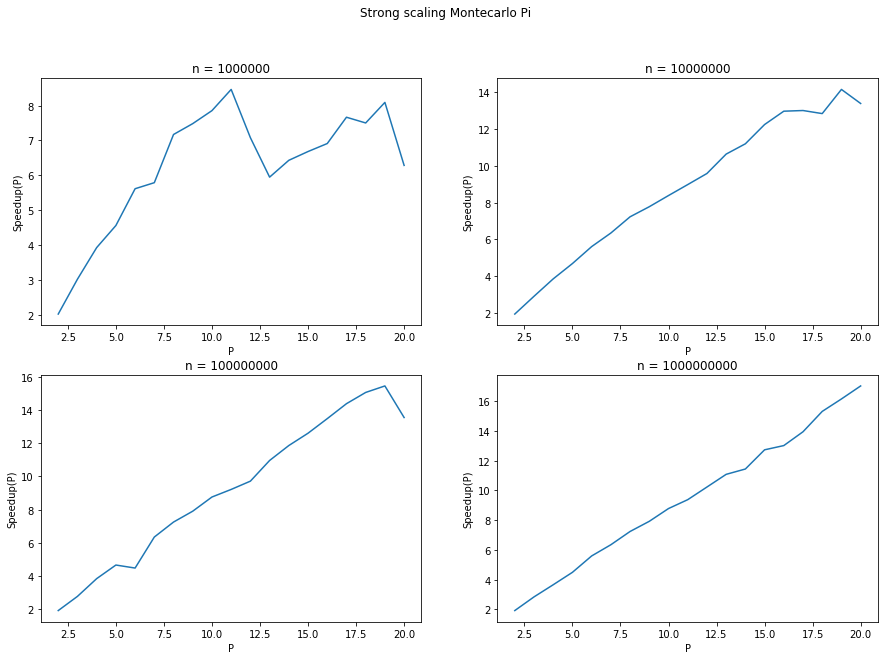

In [51]:
#Strong scaling plots
import pandas

def practical_speedup(T_1,T_P):
    return T_1/T_P

df = pandas.read_csv('mpi-pi_STRONG.csv',
                     delimiter=";",
                     float_precision='round_trip',
                    names=['Rank', 'P', 'T(P)','N'])
#We extract the maximum walltime for every P for a fixed N
idx = df.groupby(['N','P'])['T(P)'].transform(max) == df['T(P)']
strong_df = df[idx]


df_T1 = pandas.read_csv('pi_STRONG.csv',
                        delimiter=";",
                        names=['Rank', 'P', 'T(P)','N'])


counter = 0
fh = figure(figsize=(15,10))
fh.suptitle("Strong scaling Montecarlo Pi")
for i in df_T1.N.unique():
    ax = fh.add_subplot(2,2,counter+1)
    ax.set_xlabel("P")
    ax.set_ylabel("Speedup(P)")
    ax.set_title("n = " + str(i))
    k_df = strong_df.loc[strong_df['N'] == i]
    k_df_T1 = df_T1.loc[df_T1['N'] == i]
    a = practical_speedup(k_df_T1['T(P)'].values,k_df['T(P)'].values)
    b = k_df['P'].values
    plot(b, a)
    #plot(b,b)
    counter += 1

    
fh.savefig("img/StrongScalingMontecarloPi.png")





In [12]:
#Parallel overhead estimation for 1 processor, different values of n
usr_serial = np.array([0.003,0.021,0.197,1.966,19.665])
usr_paral = np.array([1.147,1.172,1.342,3.124,21.011])
usr_diff = usr_paral - usr_serial

usr_diff
mean(usr_diff)


1.1888

/home/francesco/Desktop/myPython/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


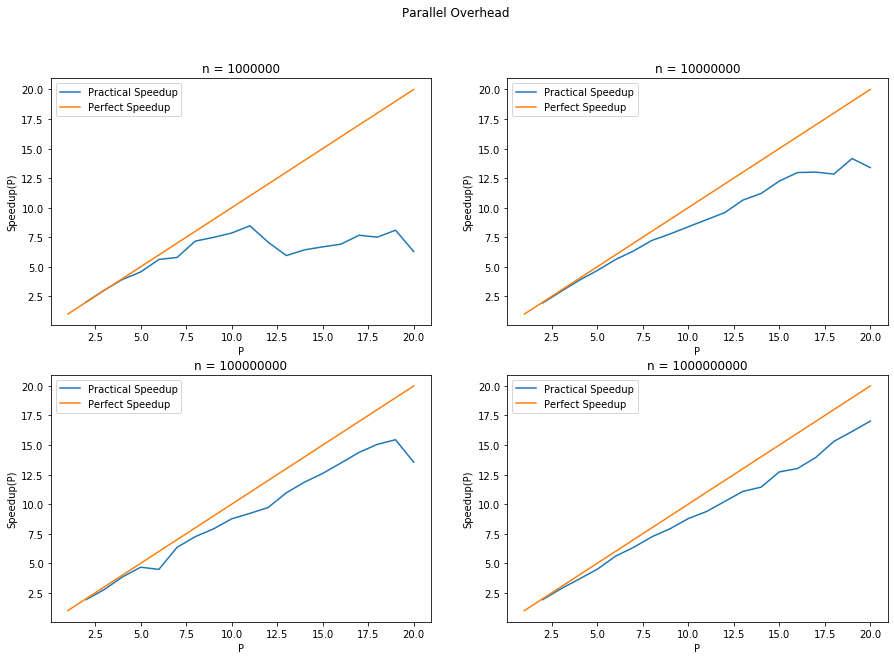

In [24]:
#Parallel overhead plots MontePI: still have more than one doubt. #TODO: plot p-practicalspeedup
import pandas

df = pandas.read_csv('mpi-pi_STRONG.csv',
                     delimiter=";",
                     float_precision='round_trip',
                    names=['Rank', 'P', 'T(P)','N'])
'''
df = pandas.read_csv('mpi-pi.csv_out',
                     delimiter=";",
                     float_precision='round_trip',
                    names=['Rank', 'P', 'T(P)','N'])
'''
#print(df)

#We extract the maximum walltime for every P for a fixed N
idx = df.groupby(['N','P'])['T(P)'].transform(max) == df['T(P)']
strong_df = df[idx]
#strong_df = strong_df.loc[strong_df['P'] != 1]
#print(strong_df)

#We also extract the walltime of the master for a fixed N
#master_df = df.loc[df['Rank'] == 0]

#print(master_df)


df_T1 = pandas.read_csv('pi_STRONG.csv',
                        delimiter=";",
                        names=['Rank', 'P', 'T(P)','N'])



counter = 0
fh = figure(figsize=(15,10))
fh.suptitle("Parallel Overhead")
for i in df_T1.N.unique():
    ax = fh.add_subplot(2,2,counter+1)
    ax.set_xlabel("P")
    ax.set_ylabel("Speedup(P)")
    ax.set_title("n = " + str(i))
    k_df = strong_df.loc[strong_df['N'] == i]
    k_df_T1 = df_T1.loc[df_T1['N'] == i]
    a = practical_speedup(k_df_T1['T(P)'].values,k_df['T(P)'].values)
    b = k_df['P'].values
    plot(b, a, label="Practical Speedup")
    plot(b,b, label="Perfect Speedup")
    ax.legend()
    counter += 1

fh.savefig("img/pMinusTrueSpeedup.png")
    
#Speedup graphs makes sens. Now put it on just one plot, add a coloured legend for different n,
#remove title and plot p as a dashed line
    
   






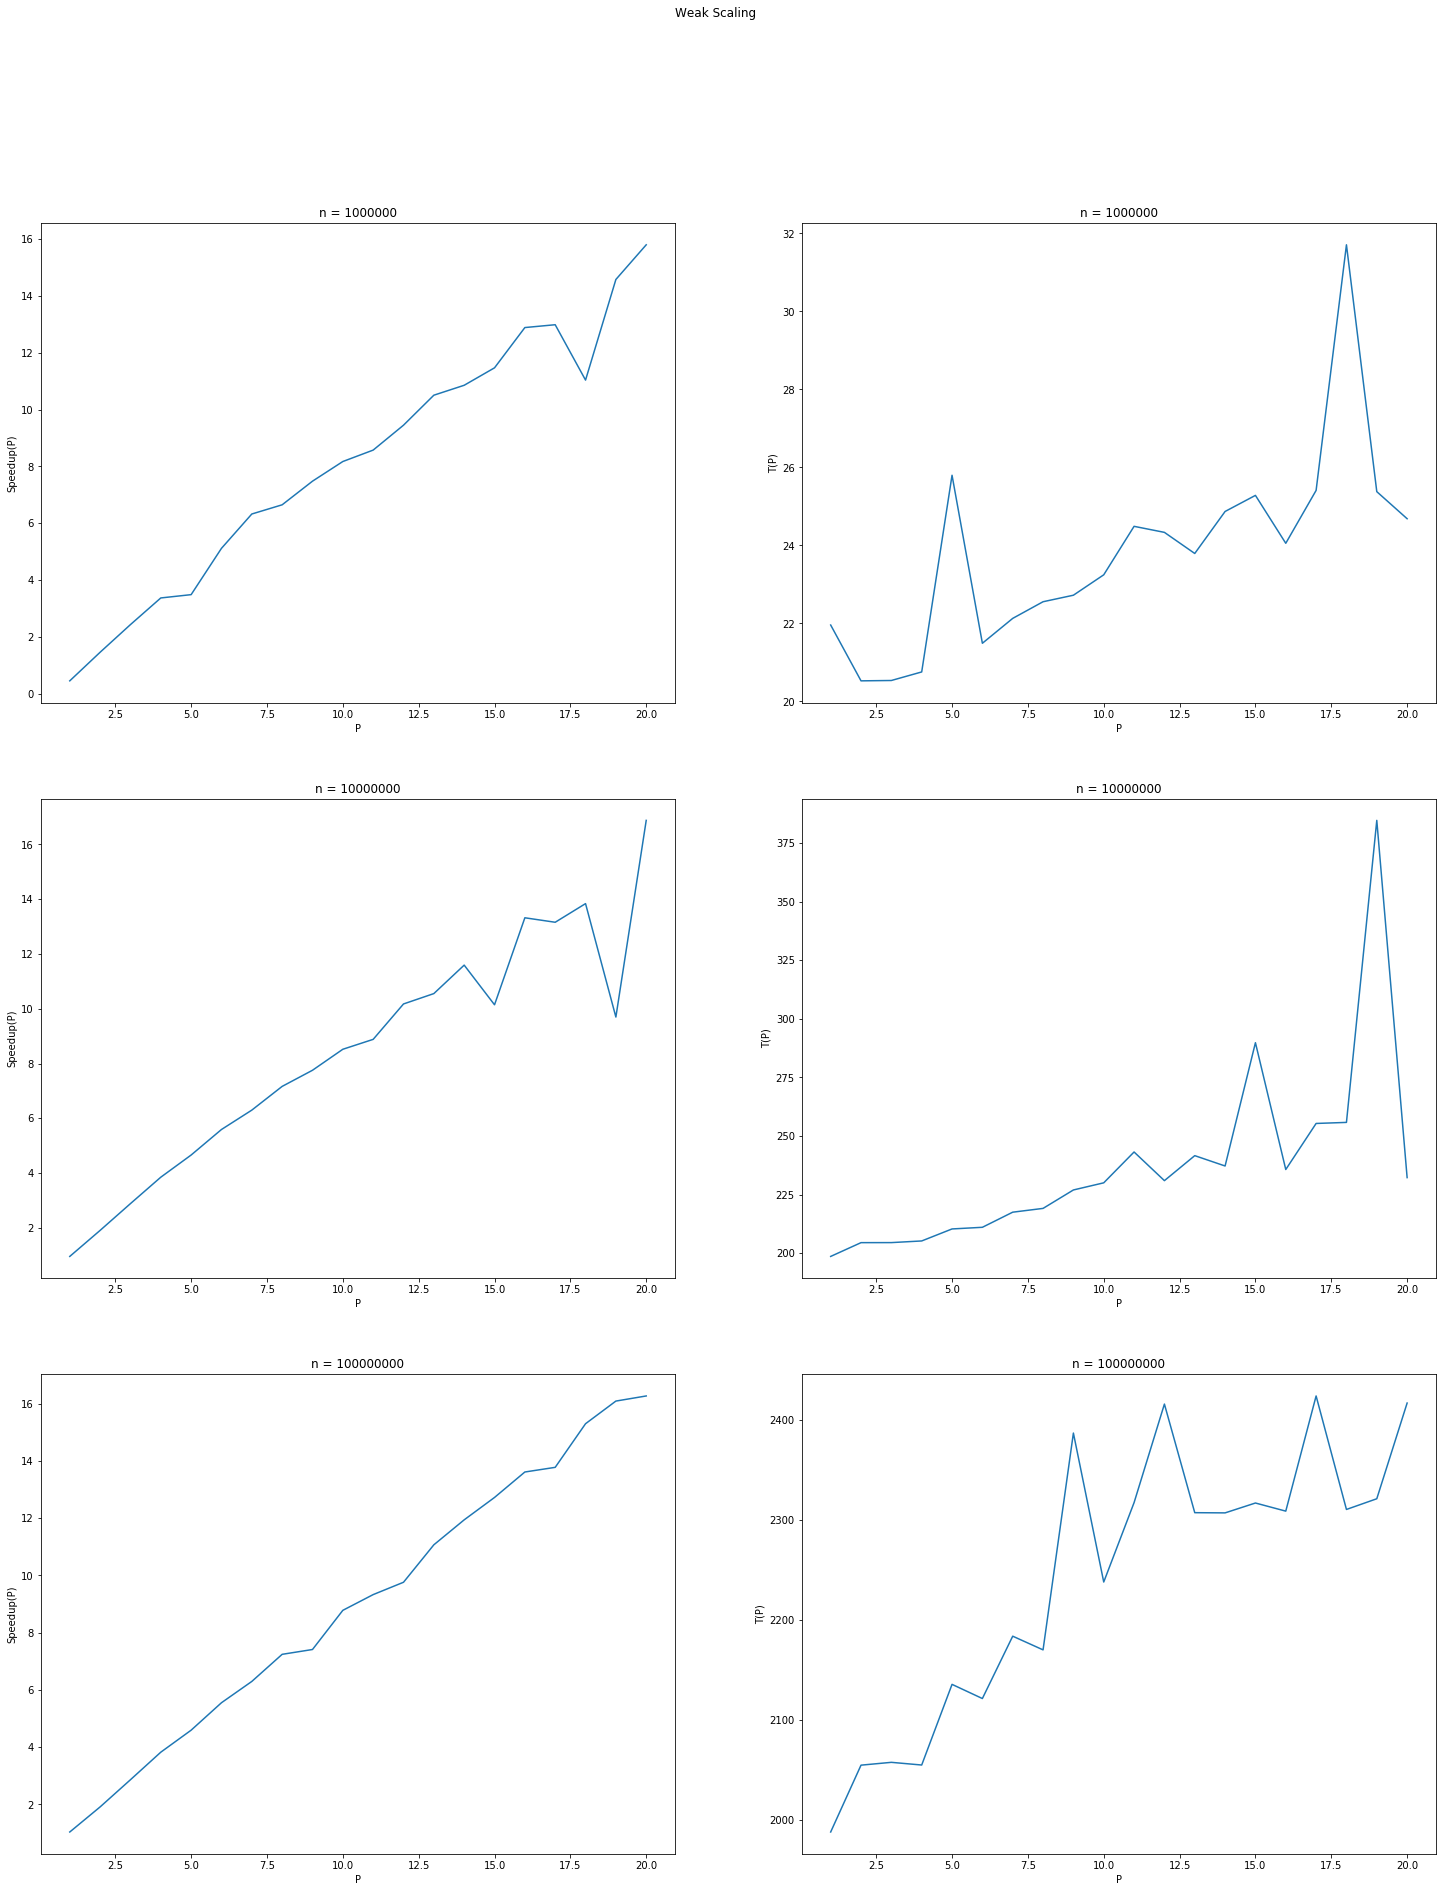

In [77]:
#Weak Scalability: N=10^8

def practical_speedup(T_1,T_P):
    return T_1/T_P

df = pandas.read_csv('mpi-pi_WEAK.csv',
                     delimiter=";",
                     float_precision='round_trip',
                    names=['Rank', 'P', 'T(P)','N'])


df_t1 = pandas.read_csv('pi_WEAK.csv',
                        delimiter=";",
                       names=['Rank','P','T','N'])


idx = df.groupby(['N','P'])['T(P)'].transform(max) == df['T(P)']
weak_df= df[idx]
    

a = (1000000,10000000,100000000)
counter = 0
fh = figure(figsize=(25,30))
fh.suptitle("Weak Scaling")
for i in a:
    ax = fh.add_subplot(3,2,(counter*2)+2)
    ax.set_xlabel("P")
    ax.set_ylabel("T(P)")
    ax.set_title("n = " + str(i))
    k_df = weak_df.loc[weak_df['N']/weak_df['P'] == i ]
    k_df_T1 = df_t1['T'].values[counter*20:20*(counter+1)]
    speedup = practical_speedup(k_df_T1,k_df['T(P)'].values)
    b = k_df['P'].values
    plot(b,k_df['T(P)'].values)
    ax = fh.add_subplot(3,2,(counter*2)+1)
    ax.set_xlabel("P")
    ax.set_ylabel("Speedup(P)")
    ax.set_title("n = " + str(i))
    plot(b, speedup)
    counter += 1
 
fh.savefig("img/WeakScalingMontePi.png")

      P      T(P)         N
0     1   7.51400   1000000
1     2   8.28695   2000000
3     3   7.59792   3000000
6     4   8.00300   4000000
10    5   8.36897   5000000
15    6   8.50701   6000000
25    7   9.22894   7000000
28    8   8.99196   8000000
44    9  10.21504   9000000
45   10  10.28895  10000000
57   11  10.50305  11000000
66   12  11.47795  12000000
80   13  12.08711  13000000
91   14  13.55600  14000000
105  15  14.06884  15000000
120  16  15.40112  16000000
136  17  14.72116  17000000
163  18  14.37688  18000000
185  19  17.19594  19000000
190  20  19.75298  20000000
      P       T(P)          N
210   1   71.64884   10000000
211   2   74.65482   20000000
213   3   72.59703   30000000
218   4   72.57318   40000000
220   5   76.15399   50000000
225   6   76.52998   60000000
237   7   81.11596   70000000
241   8   81.41494   80000000
246   9   89.43605   90000000
255  10   88.91487  100000000
265  11   98.80400  110000000
276  12   98.45901  120000000
288  13  108.78682  13

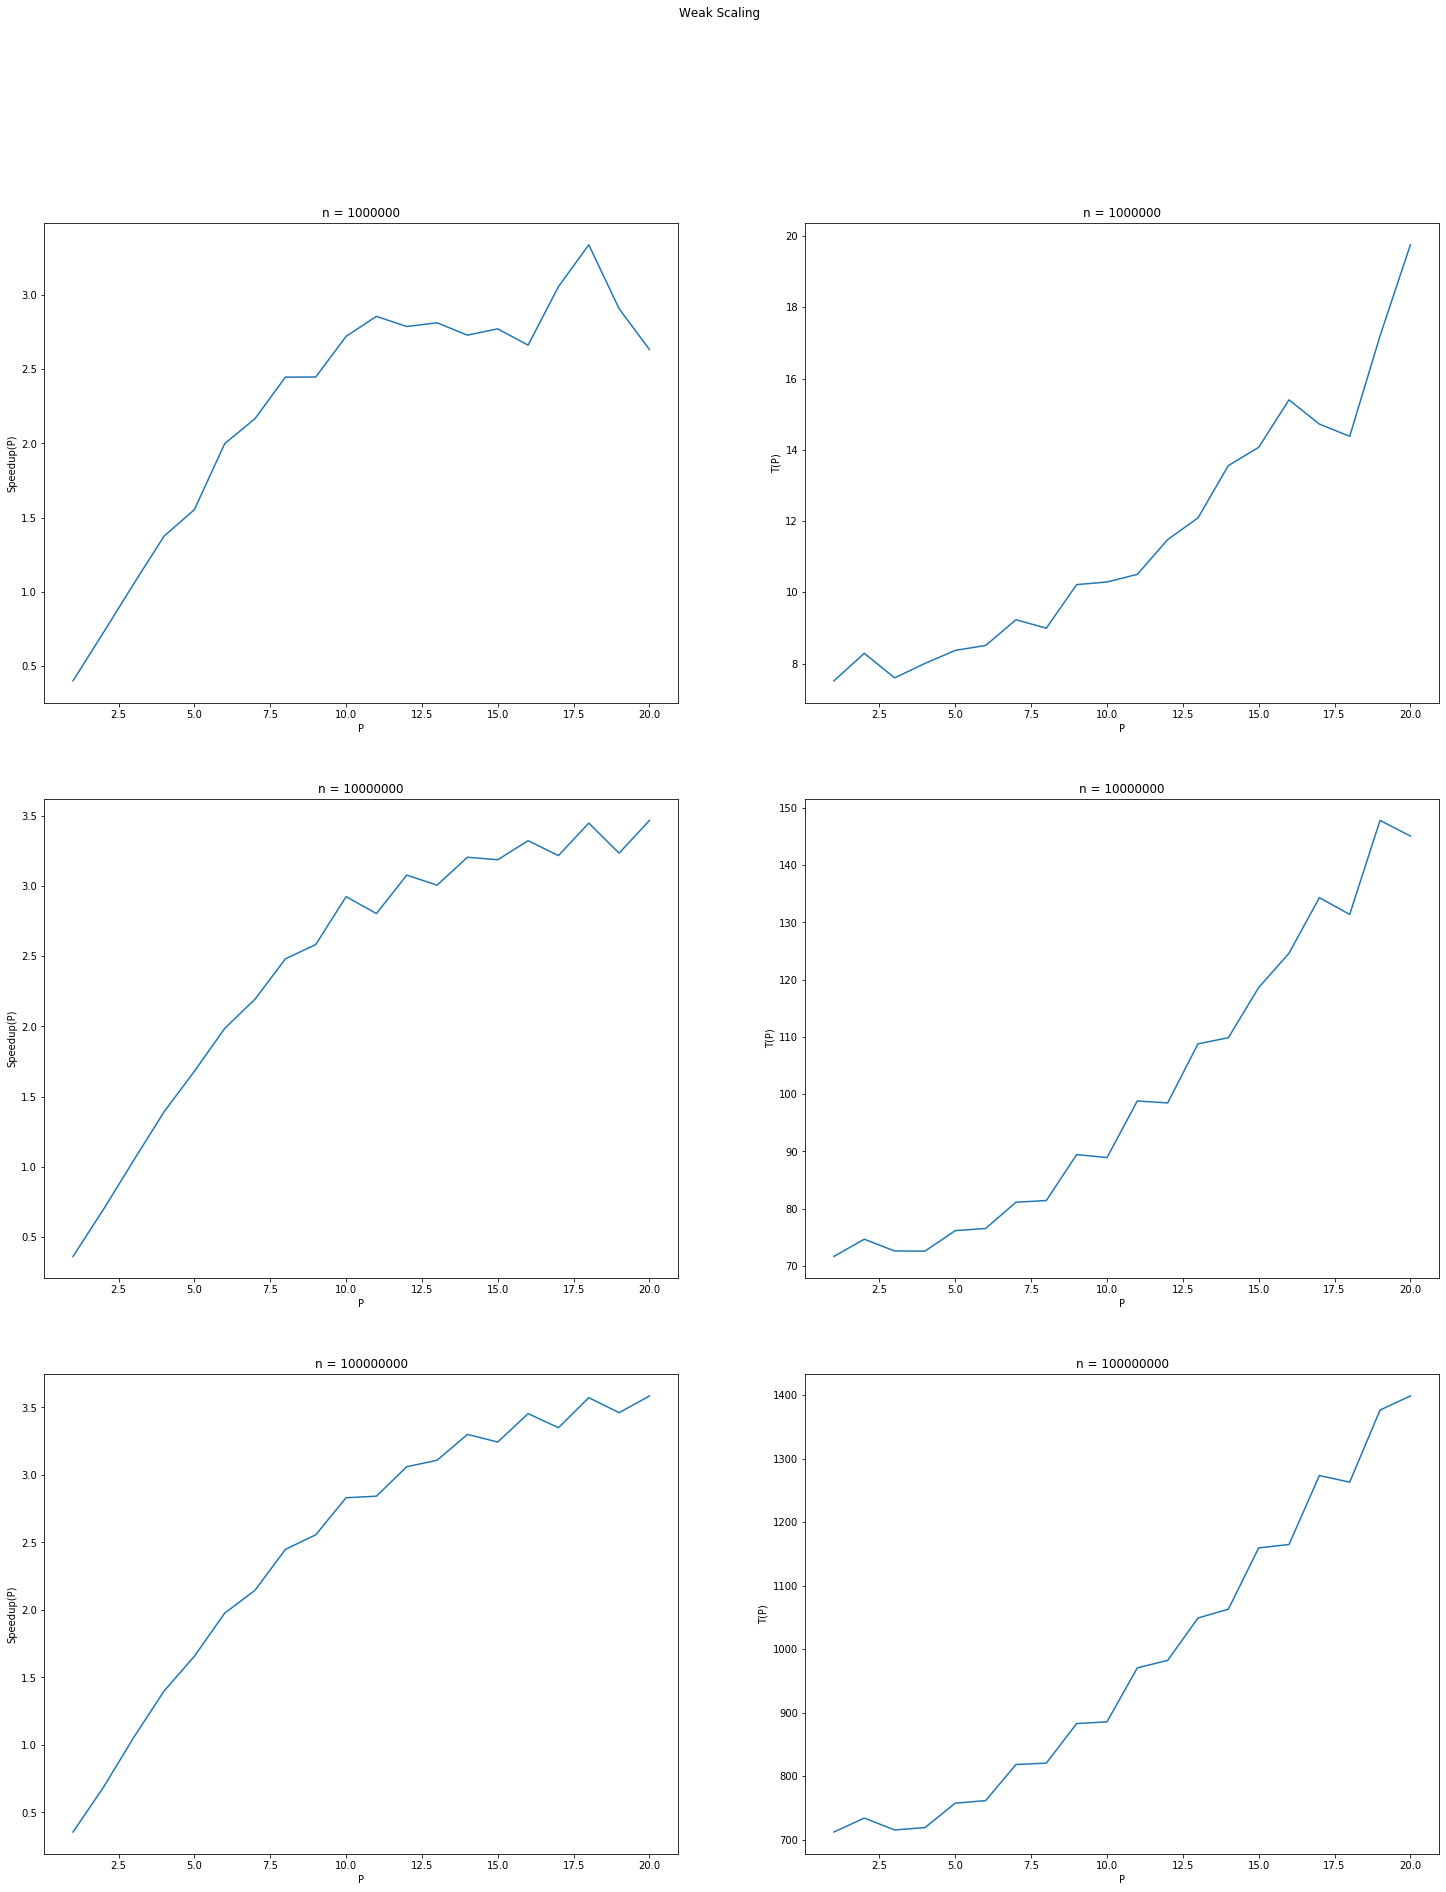

In [106]:
#Weak Scalability Partial Sum: data related to N=10^8
#We might observe this behaviour due to the increasing communication time,
#which would have a lot of sense given our model

df = pandas.read_csv('mpiPartialSumSerial_WEAK.csv',
                     delimiter=";",
                     float_precision='round_trip',
                    names=['Rank', 'P', 'T(P)','N'])

idx = df.groupby(['N','P'])['T(P)'].transform(max) == df['T(P)']
weak_df = df[idx]

#print(weak_df)

df_t1 = pandas.read_csv('partialSumSerial_WEAK.csv',
                       delimiter=";",
                       names=['Rank','P','T','N'])

#print(df_t1)

#speedup = practical_speedup(df_t1['T'].values,weak_df['T(P)'].values)
#print(weak_df)
#plot(weak_df['P'].values, speedup)
#plot(weak_df['P'].values, speedup)

a = (1000000,10000000,100000000)
counter = 0
fh = figure(figsize=(25,30))
fh.suptitle("Weak Scaling")
for i in a:
    ax = fh.add_subplot(3,2,(counter*2)+2)
    ax.set_xlabel("P")
    ax.set_ylabel("T(P)")
    ax.set_title("n = " + str(i))
    k_df = weak_df.loc[weak_df['N']/weak_df['P'] == i ]
    k_df = k_df[['P','T(P)','N']].drop_duplicates()
    #print(k_df)
    k_df_T1 = df_t1['T'].values[counter*20:20*(counter+1)]
    speedup = practical_speedup(k_df_T1,k_df['T(P)'].values)
    b = k_df['P'].values
    plot(b,k_df['T(P)'].values)
    ax = fh.add_subplot(3,2,(counter*2)+1)
    ax.set_xlabel("P")
    ax.set_ylabel("Speedup(P)")
    ax.set_title("n = " + str(i))
    plot(b, speedup)
    counter += 1   

#counter = 0
#fh = figure(figsize=(15,10))
#fh.suptitle("Weak Scaling")

#weak_df.plot(x='P',y='T(P)')
fh.savefig("img/weakScalingSum.png")

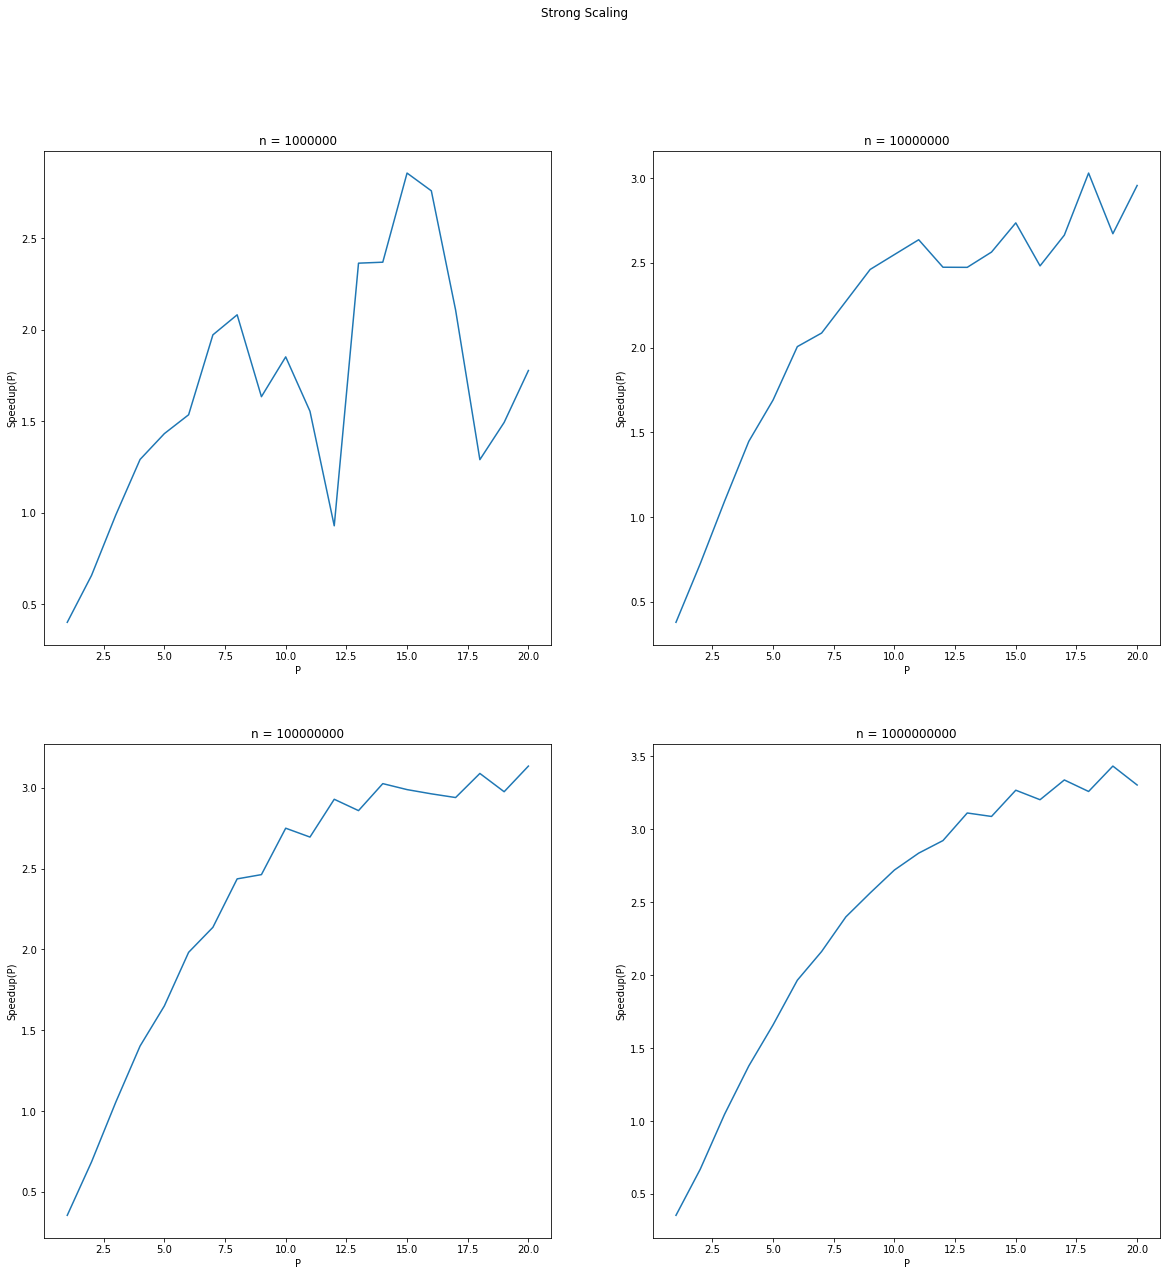

In [86]:
#Strong scaling serial sum plots
import pandas

df = pandas.read_csv('mpiPartialSumSerial_STRONG.csv',
                     delimiter=";",
                     float_precision='round_trip',
                    names=['Rank', 'P', 'T(P)','N'])

df_t1 = pandas.read_csv('partialSumSerial_STRONG.csv',
                       delimiter=";",
                     float_precision='round_trip',
                    names=['Bla', 'P', 'T','N'])

#print(df)
#We extract the maximum walltime for every P for a fixed N
idx = df.groupby(['N','P'])['T(P)'].transform(max) == df['T(P)']
strong_df = df[idx]


counter = 0
fh = figure(figsize=(20,20))
fh.suptitle("Strong Scaling")
for i in strong_df.N.unique():
    ax = fh.add_subplot(2,2,counter+1)
    ax.set_xlabel("P")
    ax.set_ylabel("Speedup(P)")
    ax.set_title("n = " + str(i))
    k_df = strong_df.loc[strong_df['N'] == i]
    k_df_t1 = df_t1.loc[df_t1['N'] == i ]
    speedup = practical_speedup(k_df_t1['T'].values,k_df['T(P)'].values)
    plot(k_df['P'],speedup)
    #k_df.plot(figsize=(15,10), x = 'P', y = 'T(P)', title="n = " + str(i), ax=axes[counter%2, counter//2])
    counter += 1
    
    #plt = k_df.plot(x = 'P', y = 'T(P)', kind='scatter', title="n = " + str(i))
    #counter += 1
    #savefig("plt.pdf")
savefig("img/SumStrongScaling.png")


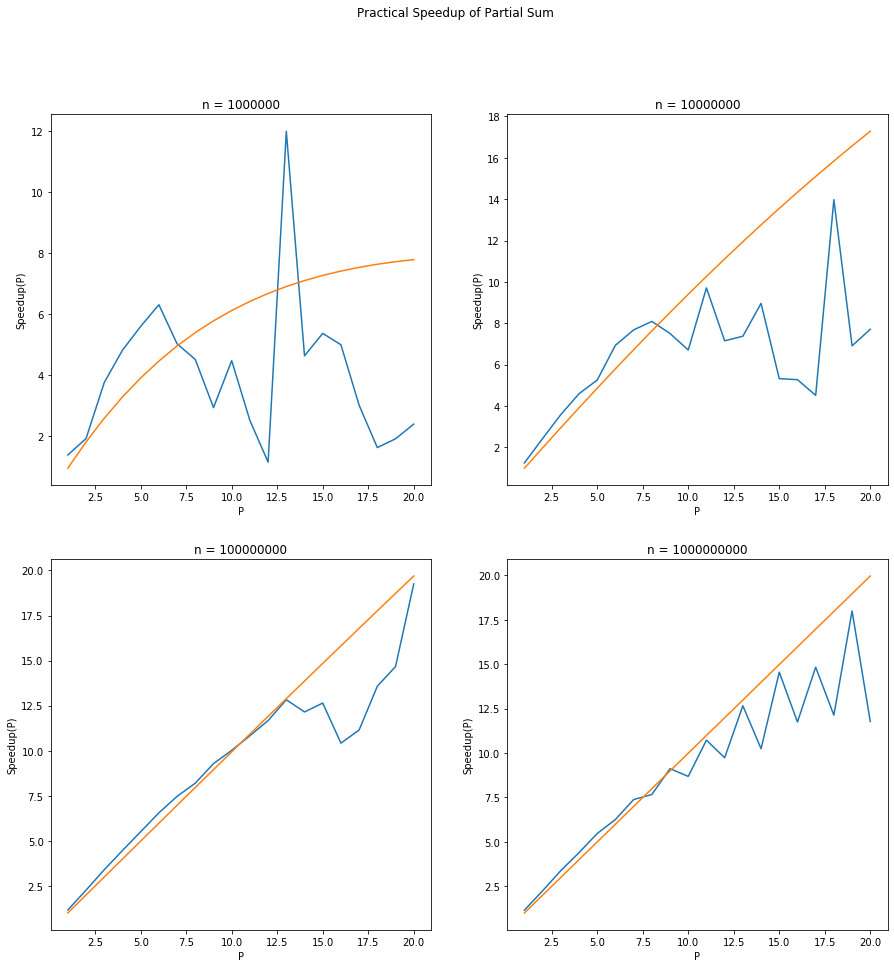

In [89]:
#Plotting practical speedup for serial sum parallel algorithm

TT_comp = 2*10e-9
TT_read = 10e-4
TT_comm = 1.5*10e-6

df = pandas.read_csv('mpiPartialSumSerial_STRONG.csv.times',
                     delimiter=";",
                     float_precision='round_trip',
                    names=['Time', 'P', 'T','N'])

df_t1 = pandas.read_csv('partialSumSerial_STRONG.csv',
                       delimiter=";",
                     float_precision='round_trip',
                    names=['Bla', 'P', 'T','N'])


def Speedup_practical(T_1,T_comp,T_read,T_comm):
    T_P = T_read + T_comm + T_comp
    return T_1/T_P

fh = figure(figsize=(15,15))
fh.suptitle("Practical Speedup of Partial Sum")
counter=0
for i in df.N.unique():
    ax = fh.add_subplot(2,2,counter+1)
    ax.set_title("n = " + str(i))
    ax.set_xlabel("P")
    ax.set_ylabel("Speedup(P)")
    #print(df)
    k_df = df.loc[df['N'] == i]
    read_time = k_df.loc[df['Time'] == 'T_READ']
    P = read_time['P'].values
    read_time = read_time['T'].values.astype(float)*1000
    comm_time = k_df.loc[df['Time'] == 'T_COMM']
    comm_time = comm_time['T'].values.astype(float)*1000
    comp_time = k_df.loc[df['Time'] == 'T_COMP']
    comp_time = comp_time['T'].values.astype(float)*1000
    k_df_t1 = df_t1.loc[df_t1['N'] == i ]
    plot(P,Speedup_practical(k_df_t1['T'].values, comp_time, read_time, comm_time))
    plot(P,Speedup(P,i,TT_comp,TT_read,TT_comm))
    counter += 1


fh.savefig("img/Practical_Theoretical_sum_speedup.png")






